In [1]:
import pandas as pd
import math
import numpy as py
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as wl


In [2]:
price_data=pd.read_csv('F:/Final_Project/Course_Study/Time_series_dataset/prices.csv') 
price_data.head()


,date,symbol,open,close,low,high,volume
0,04-01-2010,A,22.453504,22.389128,22.267525,22.625180,3815500
1,05-01-2010,A,22.324749,22.145923,22.002861,22.331903,4186000
2,06-01-2010,A,22.067240,22.067240,22.002861,22.174536,3243700
3,07-01-2010,A,22.017168,22.038626,21.816881,22.045780,3095100
4,08-01-2010,A,21.917024,22.031474,21.745350,22.067240,3733900


In [3]:
price_data=price_data.loc[price_data['symbol'] == 'AMG']
print(price_data.head())

             date symbol       open      close        low       high  volume
54654  04-01-2010    AMG  67.959999  68.879997  67.879997  69.059998  306100
54655  05-01-2010    AMG  68.779999  69.430000  68.269997  69.500000  324600
54656  06-01-2010    AMG  69.209999  70.790001  69.209999  71.470001  486200
54657  07-01-2010    AMG  70.449997  70.470001  69.970001  71.040001  434000
54658  08-01-2010    AMG  70.040001  69.820000  69.309998  70.690002  382800


In [4]:
forecast_col = 'close'
price_data.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(price_data)))
print(forecast_out)
forecast_length = forecast_out
price_data['label'] = price_data[forecast_col].shift(-forecast_out)

18


In [5]:
X=py.array(price_data.drop(['label','symbol','date'],axis=1))
X = X[:-forecast_out]
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]

price_data.dropna(inplace=True)

y= py.array(price_data['label'])

print("X:",len(X))
print("Y:",len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X: 1744
Y: 1744


In [6]:
clf = LinearRegression(n_jobs=-1) #use classifier as Linear Regression 
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)


0.962299982333


18
18
Last_Date: 29-01-2010
tail:            date symbol  open  close  low  high  volume  label   Forecast
26-01-2010  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN  153.57574
27-01-2010  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN  154.57574
28-01-2010  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN  155.57574
29-01-2010  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN  156.57574
01-02-2010  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN  157.57574
1763
349
349


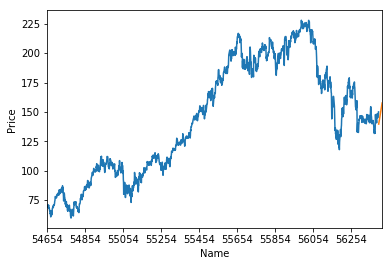

In [7]:
forecast_set = clf.predict(X_lately)

length_x_lately = len(X_lately)
print(length_x_lately)
print(len(forecast_set))
price_data['Forecast'] = py.nan
last_date = price_data.iloc[length_x_lately].date
        

print("Last_Date:",last_date)
hours = 24
i=forecast_set[0]
for next1 in range(1,length_x_lately+2):
        next_date = price_data.iloc[next1].date
        price_data.loc[next_date,'Forecast'] = i
        i=i+1

print("tail:",price_data.tail())
print(len(price_data))

print(len(X_test))
print(len(y_test))

price_data['close'].plot()
price_data['Forecast'].plot()

wl.xlabel('Name')
wl.ylabel('Price')
wl.show()

